In [1]:
#distribution fitting, solve for three parameters describing the skew normal distribution based on the 
#known parameters, min body size, max body size and median body size

#load packages
import numpy as np
import scipy.special
import scipy.optimize
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import math

from scipy.optimize import fsolve


In [2]:
filename = "/local/home/katrinac/gordita/input//bar-on_results.csv"
data = np.genfromtxt(filename,
    delimiter=',',
    names=True,
    dtype=None)

data2 = pd.read_csv(filename,
    sep=',', 
    comment='#') 

/local/home/katrinac/miniconda3/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """


In [3]:
#define functions necessary

#define a sign function because python doesn't have one?
def sign(x):
    if x > 0:
        return 1.
    elif x < 0:
        return -1.
    elif x == 0:
        return 0.
    else:
        return x
    
#functions to estimate m0 given skew parameter
def fun_delta(skew):
    return skew/(math.sqrt(1+(skew**2)))

def fun_gamma1(skew, delta):
    return  (((4-math.pi)/2)*(((delta*math.sqrt(2/math.pi))**3)/((1-(2*delta**2)/math.pi)**(3/2))))

def fun_sigmaz(muz):
    return (math.sqrt((1-(muz**2))))

def fun_muz(delta):
    return math.sqrt((2/math.pi))*delta 

#all together for m0
def fun_m0(skew):
    delta = fun_delta(skew)
    gamma1 = fun_gamma1(skew, delta)
    muz= fun_muz(delta)
    sigmaz = fun_sigmaz(muz)
    return muz - ((gamma1*sigmaz)/2)-(sign(skew)/2)*math.exp((-2*math.pi))/abs(skew)




In [4]:
data2.head()

,taxa,min_bs_g,max_bs_g,bs_g,biomass_gC,abundance,diversity
0,plants,2.000000e+02,3.000000e+06,1.500000e+05,1.500000e+17,3.000000e+12,400000.0
1,bacteria,4.000000e-14,4.000000e-11,2.600000e-14,7.339670e+16,2.854070e+30,10358.0
2,archaea,4.000000e-14,4.000000e-11,2.400000e-14,7.403230e+15,3.031050e+29,502.0
3,fungi,1.500000e-11,5.000000e+03,1.500000e-11,1.212680e+16,8.084550e+26,1000000.0
4,arthropods,1.000000e-07,9.000000e+02,8.200000e-06,1.151920e+15,1.411540e+20,943383.0


## Plants

In [6]:
plant_min= math.log10(data2.loc[data2['taxa'] == "plants", 'min_bs_g'].iloc[0])
plant_max= math.log10(data2.loc[data2['taxa'] == "plants", 'max_bs_g'].iloc[0])
plant_median= math.log10(data2.loc[data2['taxa'] == "plants", 'bs_g'].iloc[0])


print(plant_median)


5.176091259055681


In [7]:
from scipy.optimize import fsolve
from scipy.stats import skewnorm

def equations(p):
    loc, scale, skew = p
    
    return ((loc + scale*fun_m0(skew))/skewnorm.pdf(x=plant_median, a=skew, loc=loc, scale=scale), 
            0.005/skewnorm.cdf(x=plant_min, a=skew, loc=loc, scale=scale), 0.995/skewnorm.cdf(x=plant_max, a=skew, loc=loc, scale=scale))

solution = fsolve(equations, (20, 20, -0.9))




/local/home/katrinac/miniconda3/envs/python/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [8]:
loc=solution[0]
scale=solution[1]
skew=solution[2]
print(solution)


[ 4.09218201  7.94720669 -5.39105975]


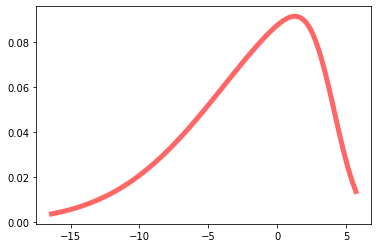

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
x = np.linspace(skewnorm.ppf(0.01, a=skew, loc=loc, scale=scale),
                skewnorm.ppf(0.99, a=skew, loc=loc, scale=scale), 100)
ax.plot(x, skewnorm.pdf(x, a=skew, loc=loc, scale=scale),
        'r-', lw=5, alpha=0.6, label='skewnorm pdf')

## Bacteria

In [10]:
bacteria_min= math.log10(data2.loc[data2['taxa'] == "bacteria", 'min_bs_g'].iloc[0])
bacteria_max= math.log10(data2.loc[data2['taxa'] == "bacteria", 'max_bs_g'].iloc[0])
bacteria_median= math.log10(data2.loc[data2['taxa'] == "bacteria", 'bs_g'].iloc[0])


print(bacteria_median)



-13.585026652029182


In [11]:
from scipy.optimize import fsolve
from scipy.stats import skewnorm

def equations(p):
    loc, scale, skew = p
    
    return ((loc + scale*fun_m0(skew))/skewnorm.pdf(x=bacteria_median, a=skew, loc=loc, scale=scale), 
            0.005/skewnorm.cdf(x=bacteria_min, a=skew, loc=loc, scale=scale), 0.995/skewnorm.cdf(x=bacteria_max, a=skew, loc=loc, scale=scale))

solution = fsolve(equations, (20, 20, -0.9))

print(solution)

[  7.53966331  15.13728904 -42.2173378 ]


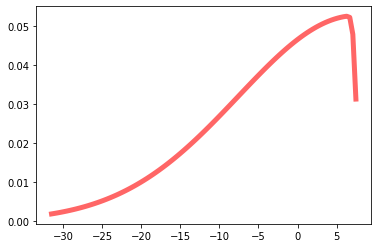

In [12]:
loc=solution[0]
scale=solution[1]
skew=solution[2]
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
x = np.linspace(skewnorm.ppf(0.01, a=skew, loc=loc, scale=scale),
                skewnorm.ppf(0.99, a=skew, loc=loc, scale=scale), 100)
ax.plot(x, skewnorm.pdf(x, a=skew, loc=loc, scale=scale),
        'r-', lw=5, alpha=0.6, label='skewnorm pdf')

## Archaea

In [13]:
archaea_min= math.log10(data2.loc[data2['taxa'] == "archaea", 'min_bs_g'].iloc[0])
archaea_max= math.log10(data2.loc[data2['taxa'] == "archaea", 'max_bs_g'].iloc[0])
archaea_median= math.log10(data2.loc[data2['taxa'] == "archaea", 'bs_g'].iloc[0])


print(archaea_median)



-13.619788758288394


In [14]:
from scipy.optimize import fsolve
from scipy.stats import skewnorm

def equations(p):
    loc, scale, skew = p
    
    return ((loc + scale*fun_m0(skew))/skewnorm.pdf(x=archaea_median, a=skew, loc=loc, scale=scale), 
            0.005/skewnorm.cdf(x=archaea_min, a=skew, loc=loc, scale=scale), 0.995/skewnorm.cdf(x=archaea_max, a=skew, loc=loc, scale=scale))

solution = fsolve(equations, (20, 20, -0.9))

print(solution)

[  7.56227603  15.18268887 -42.32106968]


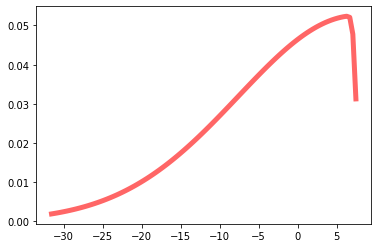

In [15]:
loc=solution[0]
scale=solution[1]
skew=solution[2]
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
x = np.linspace(skewnorm.ppf(0.01, a=skew, loc=loc, scale=scale),
                skewnorm.ppf(0.99, a=skew, loc=loc, scale=scale), 100)
ax.plot(x, skewnorm.pdf(x, a=skew, loc=loc, scale=scale),
        'r-', lw=5, alpha=0.6, label='skewnorm pdf')

## Fungi

In [17]:
fungi_min= math.log10(data2.loc[data2['taxa'] == "fungi", 'min_bs_g'].iloc[0])
fungi_max= math.log10(data2.loc[data2['taxa'] == "fungi", 'max_bs_g'].iloc[0])
fungi_median= math.log10(data2.loc[data2['taxa'] == "fungi", 'bs_g'].iloc[0])


print(fungi_median)



-10.823908740944319


In [18]:
from scipy.optimize import fsolve
from scipy.stats import skewnorm

def equations(p):
    loc, scale, skew = p
    
    return ((loc + scale*fun_m0(skew))/skewnorm.pdf(x=fungi_median, a=skew, loc=loc, scale=scale), 
            0.005/skewnorm.cdf(x=fungi_min, a=skew, loc=loc, scale=scale), 0.995/skewnorm.cdf(x=fungi_max, a=skew, loc=loc, scale=scale))

solution = fsolve(equations, (20, 20, -0.9))

print(solution)

[ 12.97312806  26.04574348 -53.55644904]


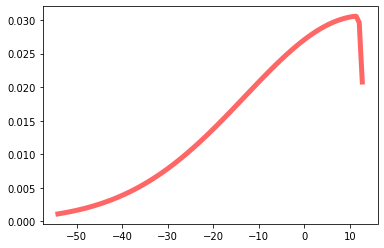

In [19]:
loc=solution[0]
scale=solution[1]
skew=solution[2]
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
x = np.linspace(skewnorm.ppf(0.01, a=skew, loc=loc, scale=scale),
                skewnorm.ppf(0.99, a=skew, loc=loc, scale=scale), 100)
ax.plot(x, skewnorm.pdf(x, a=skew, loc=loc, scale=scale),
        'r-', lw=5, alpha=0.6, label='skewnorm pdf')

## Arthropods

In [20]:
arthropods_min= math.log10(data2.loc[data2['taxa'] == "arthropods", 'min_bs_g'].iloc[0])
arthropods_max= math.log10(data2.loc[data2['taxa'] == "arthropods", 'max_bs_g'].iloc[0])
arthropods_median= math.log10(data2.loc[data2['taxa'] == "arthropods", 'bs_g'].iloc[0])


print(arthropods_median)



-5.086186147616283


In [21]:
from scipy.optimize import fsolve
from scipy.stats import skewnorm

def equations(p):
    loc, scale, skew = p
    
    return ((loc + scale*fun_m0(skew))/skewnorm.pdf(x=arthropods_median, a=skew, loc=loc, scale=scale), 
            0.005/skewnorm.cdf(x=arthropods_min, a=skew, loc=loc, scale=scale), 0.995/skewnorm.cdf(x=arthropods_max, a=skew, loc=loc, scale=scale))

solution = fsolve(equations, (20, 20, -0.9))

print(solution)

[  8.60702627  17.25726687 -25.60014772]


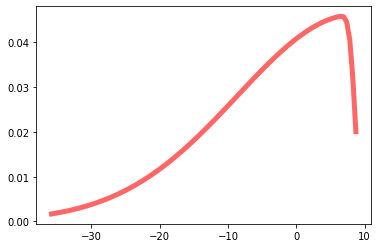

In [22]:
loc=solution[0]
scale=solution[1]
skew=solution[2]
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
x = np.linspace(skewnorm.ppf(0.01, a=skew, loc=loc, scale=scale),
                skewnorm.ppf(0.99, a=skew, loc=loc, scale=scale), 100)
ax.plot(x, skewnorm.pdf(x, a=skew, loc=loc, scale=scale),
        'r-', lw=5, alpha=0.6, label='skewnorm pdf')

## Annelids

In [23]:
annelids_min= math.log10(data2.loc[data2['taxa'] == "annelids", 'min_bs_g'].iloc[0])
annelids_max= math.log10(data2.loc[data2['taxa'] == "annelids", 'max_bs_g'].iloc[0])
annelids_median= math.log10(data2.loc[data2['taxa'] == "annelids", 'bs_g'].iloc[0])


print(annelids_median)



-3.585026652029182


In [24]:
from scipy.optimize import fsolve
from scipy.stats import skewnorm

def equations(p):
    loc, scale, skew = p
    
    return ((loc + scale*fun_m0(skew))/skewnorm.pdf(x=annelids_median, a=skew, loc=loc, scale=scale), 
            0.005/skewnorm.cdf(x=annelids_min, a=skew, loc=loc, scale=scale), 0.995/skewnorm.cdf(x=annelids_max, a=skew, loc=loc, scale=scale))

solution = fsolve(equations, (20, 20, -0.9))

print(solution)

[  7.1406481   14.33397181 -39.27494994]


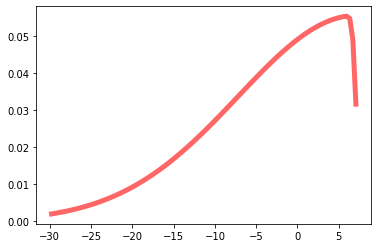

In [25]:
loc=solution[0]
scale=solution[1]
skew=solution[2]
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
x = np.linspace(skewnorm.ppf(0.01, a=skew, loc=loc, scale=scale),
                skewnorm.ppf(0.99, a=skew, loc=loc, scale=scale), 100)
ax.plot(x, skewnorm.pdf(x, a=skew, loc=loc, scale=scale),
        'r-', lw=5, alpha=0.6, label='skewnorm pdf')

## Molluscs

In [26]:
molluscs_min= math.log10(data2.loc[data2['taxa'] == "molluscs", 'min_bs_g'].iloc[0])
molluscs_max= math.log10(data2.loc[data2['taxa'] == "molluscs", 'max_bs_g'].iloc[0])
molluscs_median= math.log10(data2.loc[data2['taxa'] == "molluscs", 'bs_g'].iloc[0])


print(molluscs_median)



-3.431798275933005


In [27]:
from scipy.optimize import fsolve
from scipy.stats import skewnorm

def equations(p):
    loc, scale, skew = p
    
    return ((loc + scale*fun_m0(skew))/skewnorm.pdf(x=molluscs_median, a=skew, loc=loc, scale=scale), 
            0.005/skewnorm.cdf(x=molluscs_min, a=skew, loc=loc, scale=scale), 0.995/skewnorm.cdf(x=molluscs_max, a=skew, loc=loc, scale=scale))

solution = fsolve(equations, (20, 20, -0.9))

print(solution)

[  7.95264408  15.95838399 -34.02107775]


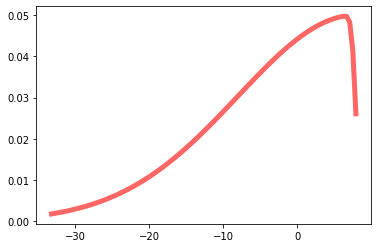

In [28]:
loc=solution[0]
scale=solution[1]
skew=solution[2]
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
x = np.linspace(skewnorm.ppf(0.01, a=skew, loc=loc, scale=scale),
                skewnorm.ppf(0.99, a=skew, loc=loc, scale=scale), 100)
ax.plot(x, skewnorm.pdf(x, a=skew, loc=loc, scale=scale),
        'r-', lw=5, alpha=0.6, label='skewnorm pdf')

## Cnidarians

In [29]:
cnidarians_min= math.log10(data2.loc[data2['taxa'] == "cnidarians", 'min_bs_g'].iloc[0])
cnidarians_max= math.log10(data2.loc[data2['taxa'] == "cnidarians", 'max_bs_g'].iloc[0])
cnidarians_median= math.log10(data2.loc[data2['taxa'] == "cnidarians", 'bs_g'].iloc[0])


print(cnidarians_median)



-2.337242168318426


In [30]:
from scipy.optimize import fsolve
from scipy.stats import skewnorm

def equations(p):
    loc, scale, skew = p
    
    return ((loc + scale*fun_m0(skew))/skewnorm.pdf(x=cnidarians_median, a=skew, loc=loc, scale=scale), 
            0.005/skewnorm.cdf(x=cnidarians_min, a=skew, loc=loc, scale=scale), 0.995/skewnorm.cdf(x=cnidarians_max, a=skew, loc=loc, scale=scale))

solution = fsolve(equations, (20, 20, -1))

print(solution)

[ 10.11849452  20.29820005 -30.52158796]


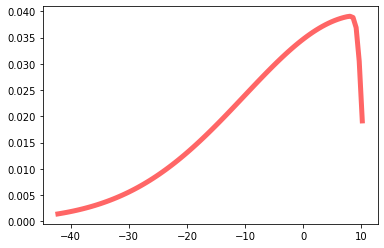

In [31]:
loc=solution[0]
scale=solution[1]
skew=solution[2]
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
x = np.linspace(skewnorm.ppf(0.01, a=skew, loc=loc, scale=scale),
                skewnorm.ppf(0.99, a=skew, loc=loc, scale=scale), 100)
ax.plot(x, skewnorm.pdf(x, a=skew, loc=loc, scale=scale),
        'r-', lw=5, alpha=0.6, label='skewnorm pdf')